<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import warnings
import dateparser

In [19]:
%matplotlib inline

In [20]:
warnings.filterwarnings("ignore")

In [21]:
sns.set_style('white')

In [22]:
column_names=["Data", "Rating", "Titolo", "Testo"]

In [23]:
data = pd.read_csv("data/pandenus_gaeaulenti_it.csv", header=None, names=column_names, parse_dates=['Data'], date_parser=dateparser.parse)

In [24]:
data.head()

,Data,Rating,Titolo,Testo
0,2022-03-19,10,3 euro un cappuccino... Questi sono fuori di t...,Il titolo parla da solo. 3 euro per un cappucc...
1,2022-03-13,20,Bocciato,Brunch domenicale: accoglienza pessima del “di...
2,2022-03-05,10,Pranzo pessimo,Abbiamo letto il menu e fatto domande alla cam...
3,2022-02-27,10,Brunch non qualificabile,Non do una stella perché il posto tutto sommat...
4,2022-02-16,10,Prezzi da pazzi,Aperitivo in 3 al tavolino sul marciapiedi. Sp...


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Data    110 non-null    datetime64[ns]
 1   Rating  110 non-null    int64         
 2   Titolo  110 non-null    object        
 3   Testo   110 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 3.6+ KB


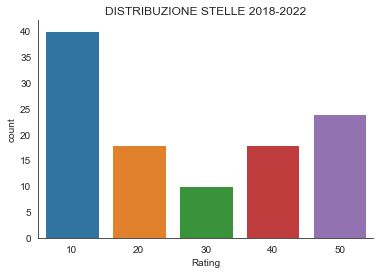

In [9]:
sns.countplot(x="Rating", data=data)
plt.title(f"Distribuzione stelle {data.Data.dt.year.min()}-{data.Data.dt.year.max()}".upper())
sns.despine();

In [10]:
print(f"Mediana stelle: {data.Rating.median()}")

Mediana stelle: 20.0


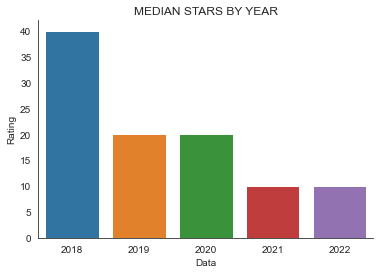

In [11]:
stars_by_year = data.groupby(by=data.Data.dt.year).median().reset_index()
sns.barplot(x="Data", y="Rating", data=stars_by_year)
plt.title("Median stars by year".upper())
sns.despine();

In [12]:
stars_by_year

,Data,Rating
0,2018,40.0
1,2019,20.0
2,2020,20.0
3,2021,10.0
4,2022,10.0


In [13]:
reviews_by_year = data.groupby(by=data.Data.dt.year).apply(lambda x: len(x)).reset_index()

In [14]:
reviews_by_year[0]

0    43
1    40
2    10
3     9
4     8
Name: 0, dtype: int64

In [15]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/bernardino/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [16]:
stop_words = nltk.corpus.stopwords.words("italian")

In [17]:
stop_words.extend(["locale", "euro", "tadino", "pandenus", "molto", "posto", "uno", "due", "po", "stato"])

In [18]:
data.Testo = data.Testo.apply(lambda x: str.lower(x))

In [19]:
data.head()

,Data,Rating,Titolo,Testo
0,2022-03-19,10,3 euro un cappuccino... Questi sono fuori di t...,il titolo parla da solo. 3 euro per un cappucc...
1,2022-03-13,20,Bocciato,brunch domenicale: accoglienza pessima del “di...
2,2022-03-05,10,Pranzo pessimo,abbiamo letto il menu e fatto domande alla cam...
3,2022-02-27,10,Brunch non qualificabile,non do una stella perché il posto tutto sommat...
4,2022-02-16,10,Prezzi da pazzi,aperitivo in 3 al tavolino sul marciapiedi. sp...


In [20]:
all_reviews = (" ").join(data.Testo)
all_reviews[:10]

'il titolo '

In [21]:
tokens = nltk.tokenize.word_tokenize(all_reviews, language="italian")

In [22]:
all_reviews_no_stopword = [word for word in tokens if word not in stop_words and word.isalpha()]

In [23]:
all_reviews_no_stopword[:10]

['titolo',
 'parla',
 'solo',
 'cappuccino',
 'giustificabili',
 'alcuni',
 'gestori',
 'locali',
 'perso',
 'completamente']

In [24]:
from collections import Counter

In [25]:
word_count = pd.DataFrame.from_dict(data=Counter(all_reviews_no_stopword), orient='index').reset_index()
word_count.columns=["word", "count"]
word_count.sort_values(by="count", ascending=False, inplace=True)


In [26]:
word_count.head()

,word,count
229,servizio,45
181,aperitivo,35
101,cibo,31
43,tavolo,30
400,personale,28


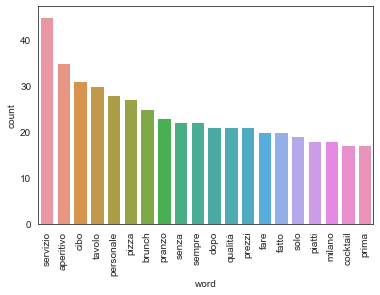

In [27]:
sns.barplot(x="word",y ="count", data=word_count[:20])
plt.xticks(rotation=90);

In [25]:
import os
all_files = []
for file in os.listdir("data"):
    if "all" not in file:
        all_files.append(file)
all_files

['pandenus_melzideril_it.csv',
 'pandenus_concordia_it.csv',
 'pandenus_lafoppa_it.csv',
 'pandenus_gaeaulenti_it.csv',
 'pandenus_mercato_it.csv',
 'pandenus_tadino_it.csv']

In [26]:
li = []

for filename in all_files:
    df = pd.read_csv(os.path.join("data", filename), index_col=None, header=None, names=column_names, parse_dates=['Data'], date_parser=dateparser.parse)
    df["Locale"] = filename.split('_')[1]
    li.append(df)

frame = pd.concat(li, axis=0, ignore_index=True)


In [27]:
frame.head()

,Data,Rating,Titolo,Testo,Locale
0,2022-01-31,10,Non ci siamo per niente,Sono stata con amici per un brunch e sono rima...,melzideril
1,2022-01-05,20,Si mangia insieme ai moscerini,Il cibo è buono ma da un po’ di tempo ci sono ...,melzideril
2,2021-10-12,20,"Poco pulizia , e molta sgarbatezza .","Mosche sulle brioche , insetti in bagno . Poco...",melzideril
3,2021-09-06,20,Mai più,Il locale non sembra pulito e il dehor è propr...,melzideril
4,2021-08-02,10,"Pandenus, che succede?","Servizio inesistente. Sono entrata, totale cli...",melzideril


In [28]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Data    2224 non-null   datetime64[ns]
 1   Rating  2224 non-null   int64         
 2   Titolo  2224 non-null   object        
 3   Testo   2224 non-null   object        
 4   Locale  2224 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 87.0+ KB


In [11]:
frame.to_csv('data/all.csv', index=False)

In [31]:
frame["Testo"] = frame["Testo"].str.lower()
frame["Titolo"] = frame["Titolo"].str.lower()

In [32]:
best = frame.groupby(by="Locale").median().sort_values(by="Rating")
best

,Rating
Locale,
gaeaulenti,20.0
mercato,20.0
concordia,30.0
lafoppa,30.0
melzideril,30.0
tadino,30.0


In [37]:
frame["Etichetta"] = frame["Rating"].apply(lambda x: 'pos' if x>30 else 'neg')

In [38]:
frame['Testo'] = frame['Testo'].str.replace(r'[^\w\s]+', '')


In [39]:
frame.head()

,Data,Rating,Titolo,Testo,Locale,Etichetta
0,2022-01-31,10,non ci siamo per niente,sono stata con amici per un brunch e sono rima...,melzideril,neg
1,2022-01-05,20,si mangia insieme ai moscerini,il cibo è buono ma da un po di tempo ci sono t...,melzideril,neg
2,2021-10-12,20,"poco pulizia , e molta sgarbatezza .",mosche sulle brioche insetti in bagno poco p...,melzideril,neg
3,2021-09-06,20,mai più,il locale non sembra pulito e il dehor è propr...,melzideril,neg
4,2021-08-02,10,"pandenus, che succede?",servizio inesistente sono entrata totale clien...,melzideril,neg


In [40]:
frame.to_csv('data/all.csv', index=False)


In [41]:
frame.head()

,Data,Rating,Titolo,Testo,Locale,Etichetta
0,2022-01-31,10,non ci siamo per niente,sono stata con amici per un brunch e sono rima...,melzideril,neg
1,2022-01-05,20,si mangia insieme ai moscerini,il cibo è buono ma da un po di tempo ci sono t...,melzideril,neg
2,2021-10-12,20,"poco pulizia , e molta sgarbatezza .",mosche sulle brioche insetti in bagno poco p...,melzideril,neg
3,2021-09-06,20,mai più,il locale non sembra pulito e il dehor è propr...,melzideril,neg
4,2021-08-02,10,"pandenus, che succede?",servizio inesistente sono entrata totale clien...,melzideril,neg
